<a href="https://colab.research.google.com/github/Snrts/PRA3024_BigDataInPhysics_SanneAarts/blob/Week_4/SanneAartsML2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install tensorflow==2.3.0
# %pip install gym==0.22
# %pip install keras
%pip install keras-rl2==1.0.4

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gym
import numpy as np
from matplotlib import pyplot as plt
import random

from collections import deque
from keras.models import Sequential
from keras.layers import Dense,  Flatten
from keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy, BoltzmannQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory

In [ ]:
ENV_NAME = "CartPole-v1"
EPISODES = 1000
MAX_RUNS = 10
MAX_STEPS = 10000
BATCH_SIZE = 50
MEMORY_SIZE = 10000
# MEMORY_SIZE = 10000
TARGET_MODEL_UPDATE = 1000
GAMMA = 0.99
LEARNING_RATE = 1e-3
MAX_EXPLORATION_RATE = 1
MIN_EXPLORATION_RATE = 0.01
EXPLORATION_RATE_DECAY = 0.995

$$Q_{new}(s, a)=Q(s,a)+\alpha (r(s,a)+ \gamma * max(Q'(s',a'))-Q(s,a)) \hspace{1em}
\begin{array}{rl}
Q_{new}:& \text{New Q value}\\
Q:& \text{Current Q value}\\
s:& \text{State}\\
a:& \text{Action}\\
\alpha:& \text{Learning Rate}\\
r:& \text{reward}\\
\gamma:& \text{Discount rate}\\
max(Q'(s',a')):& \text{Maximum expected future reward}\\
\end{array}$$

In [ ]:
class dqnSolver:
    def __init__(self, env):
        self.env = env
        self.states = self.env.observation_space.shape[0]
        self.actions = self.env.action_space.n
        
        self.model = self.build_model()
        self.learning_rate=LEARNING_RATE
        self.memory = SequentialMemory(
                    limit=50000, 
                    window_length=1)
        self.policy = LinearAnnealedPolicy(EpsGreedyQPolicy(eps=0.2), attr='eps', value_max=1., value_min=.01, value_test=.05, nb_steps=50000)
        # self.policy = EpsGreedyQPolicy(eps=MAX_EXPLORATION_RATE)
        self.dqn = self.build_agent()
        
    def build_model(self):
        # Building Network
        # Create a Sequential model using keras
        model = Sequential()
        #Input - 4 different states 
        model.add(Flatten(input_shape=(1,self.states)))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(24, activation='relu'))
        # Output - one node for each possible action, the one with the 
        # highest output value will be be returned as action
        model.add(Dense(self.actions, activation='linear'))
        # model.compile(loss='mse', optimizer=RMSprop(lr=LEARNING_RATE))
        model.summary()
        return model
       
    # #The deep learning model, to use Q-learning
    def build_agent(self): 
        dqn = DQNAgent(
                    model=self.model, 
                    memory=self.memory, 
                    policy=self.policy,
                    nb_actions = self.actions,
                    nb_steps_warmup = 10,
                    target_model_update = 1e-2,
                    gamma = GAMMA,
                    batch_size=BATCH_SIZE,
                    )
        # dqn.compile(Adam(lr=LEARNING_RATE), metrics=['mae'])
        return dqn

        
    
   

In [ ]:
def cartpole():
    env = gym.make(ENV_NAME)
    solver = dqnSolver(env)
    dqn = solver.dqn
    return dqn
    # history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)
    # env.close()
    # return history
    

In [ ]:
history = cartpole()
# plt.plot(history.history['episode_reward'])
dir(history)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 4)                 0         
                                                                 
 dense_21 (Dense)            (None, 24)                120       
                                                                 
 dense_22 (Dense)            (None, 24)                600       
                                                                 
 dense_23 (Dense)            (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


['_DQNAgent__policy',
 '_DQNAgent__test_policy',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_on_test_begin',
 '_on_test_end',
 '_on_train_begin',
 '_on_train_end',
 'backward',
 'batch_size',
 'compile',
 'compiled',
 'compute_batch_q_values',
 'compute_q_values',
 'custom_model_objects',
 'delta_clip',
 'dueling_type',
 'enable_double_dqn',
 'enable_dueling_network',
 'fit',
 'forward',
 'gamma',
 'get_config',
 'layers',
 'load_weights',
 'memory',
 'memory_interval',
 'metrics_names',
 'model',
 'nb_actions',
 'nb_steps_warmup',
 'policy',
 'process_state_batch',
 'processor',
 'recent_action',
 'recent_observation',
 'reset_states',
 'save_we

In [ ]:
history.history['time']

KeyError: 'time'

## The cartPole
### Action space
<ul>
<li>push left - 0</li>
<li>push right - 1</li>
</ul>

### Observation space
|num|Observation|Values|Episode terminates for:|
|-|-|-|-|
|0|Cart position|$\pm$ 4.8|$\lvert x \rvert > 2.4$|
|1|Cart Velocity|$\pm \infty$||
|2|Pole Angle|$\pm$ 24 $^ \circ$|$\lvert \theta \rvert > 12 ^\circ $|
|3|Pole Angular Velocity|$\pm\infty$||


In [ ]:
if __name__ == '__main__':
    env = gym.make(ENV_NAME)

In [ ]:
# # def cartpole():
# #     env = gym.make(ENV_NAME)
# #     solver = dqnSolver(env)
# #     solver.

# def cartpole():
#     episodes = MAX_RUNS

#     env = gym.make(ENV_NAME)
#     solver = dqnSolver(env)
#     dqn = solver.build_agent()
#     runsteplog, scores = [], []
#     for episode in range(episodes):
#         state = env.reset()
#         # state = np.reshape(state, [1, states])
#         done = False
#         # starting score is 0
#         score = 0
#         # anytime the cartpole has not fully fallen over
#         while not done:
#             #load random action left (0) or right(1) 
#             action = dqn.act(state)
#             #apply random action
#             next_state, reward, done,_ = env.step(action)
#             # reward = reward if not done else - reward
#             score+=reward

#             dqn.remember(state, action,reward, next_state, done)
#             state= next_state
#         print(f"episode: {episode}, score: {score}")
#         scores.append(score)
#         dqn.train()
#         # train the agent on a batch of previous experiences
        
#         # print(f'episode: {episode}, Score: {score}')

#     # plt.figure(figsize=(20, 5))
#     # plt.plot(range(len(scores.history['episode_reward'])), scores.history['episode_reward'],label='episode reward')
#     # plt.xlabel('Episode')
#     # plt.ylabel('Reward')
#     # plt.show()
#     # plt.plot(scores)
#     # plt.xlabel("episode")
#     # plt.ylabel("score")
#     # plt.title("Training scores")
#     # plt.show()

#     # env.close()

# #     env.close()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 24)                120       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Testing for 10 episodes ...
Episode 1: reward: 8.000, steps: 8
Episode 2: reward: 8.000, steps: 8
Episode 3: reward: 10.000, steps: 10
Episode 4: reward: 8.000, steps: 8
Episode 5: reward:

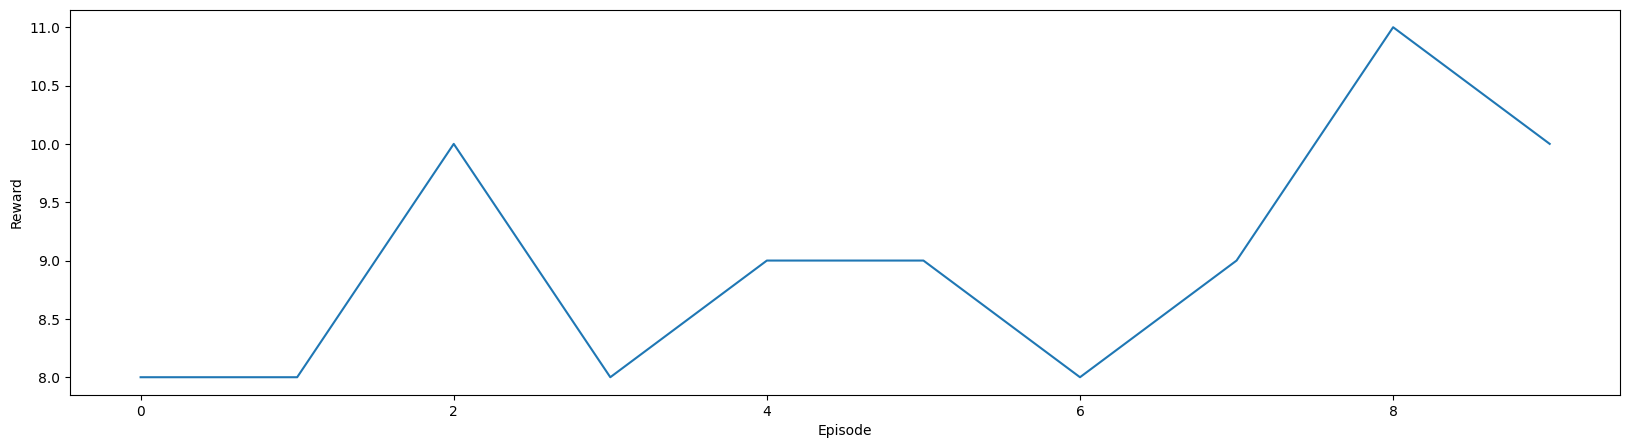

In [ ]:
cartpole()

## Agent

$$loss=\left(r+\gamma max \hat{Q}(s,a')-Q(s,a\right)^2$$